In [1]:
import pandas as pd
import pickle
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneOut
import numpy as np
from itertools import combinations
from tqdm import tqdm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("data/dict_of_dfs.pickle", "rb") as handle:
    dict_of_dfs = pickle.load(handle)

/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [3]:
# domains = ['brand', 'good', 'trait', 'food', 'occupation', 'risk', 'people']
# dims = [('sincere','exciting'),
#         ('hedonic','utilitarian'),
#         ('masculine','feminine'),
#         ('tasty','nutritious'),
#         ('significance','autonomy'),
#         ('dread-inducing','unknowable'),
#         ('warm', 'competent')]

In [4]:
domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']

dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]

# Split-half reliability

In [5]:
n_splits=100

In [6]:
split_halfs = []
for domain, dim_pair in zip(domains, dims):
    df = dict_of_dfs[domain]
    for dim in dim_pair:
        dim_rs = []
        judgments = df[dim]
        for _ in range(n_splits):
            judgments = judgments.sample(frac=1)
            first_half  = judgments.iloc[::2,:].mean()
            second_half = judgments.iloc[1::2,:].mean()
            nas = np.logical_or(np.isnan(first_half), np.isnan(second_half))
            r, _ = pearsonr(first_half[~nas], second_half[~nas])
            dim_rs.append(r)
            
        split_halfs.append([dim] + dim_rs)
split_halfs = pd.DataFrame(split_halfs)#, columns=['judgment_dimension','average_split-half_reliability'])
split_halfs

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,masculine,0.943504,0.942157,0.934695,0.945955,0.941503,0.935892,0.926210,0.945882,0.946660,...,0.857939,0.923768,0.903361,0.924920,0.952306,0.940373,0.945947,0.923661,0.920142,0.941066
1,feminine,0.939851,0.942625,0.946023,0.938325,0.929772,0.931203,0.946685,0.935865,0.943761,...,0.945156,0.931520,0.915428,0.933862,0.949823,0.947528,0.952472,0.910686,0.944490,0.937936
2,dread-inducing,0.972328,0.959071,0.969955,0.967804,0.973382,0.965071,0.971717,0.968912,0.969952,...,0.978650,0.969726,0.966816,0.972692,0.961579,0.968244,0.964758,0.970862,0.974081,0.970479
3,unknowable,0.855152,0.899093,0.892854,0.908936,0.909525,0.908937,0.902699,0.908105,0.922295,...,0.920828,0.905514,0.918127,0.921110,0.909149,0.920617,0.902972,0.933087,0.901368,0.899128
4,warm,0.906905,0.934646,0.898791,0.921618,0.923566,0.876731,0.903211,0.916959,0.907760,...,0.896380,0.923981,0.918707,0.891018,0.922457,0.933156,0.928623,0.911414,0.900697,0.909566
5,competent,0.855689,0.824748,0.855139,0.871474,0.834779,0.870958,0.821791,0.842847,0.852647,...,0.852600,0.884977,0.828821,0.865724,0.838922,0.843533,0.853547,0.844059,0.858151,0.872352
6,tasty,0.769754,0.626149,0.666327,0.760141,0.706373,0.635922,0.696305,0.705836,0.748351,...,0.679305,0.724328,0.764763,0.765947,0.697128,0.570860,0.692523,0.655921,0.751627,0.678763
7,nutritious,0.900114,0.892316,0.910446,0.915309,0.934113,0.930660,0.924014,0.928066,0.930836,...,0.906776,0.928667,0.915483,0.895146,0.914647,0.928956,0.929697,0.929113,0.913760,0.918983
8,significance,0.927984,0.920817,0.946632,0.939362,0.915508,0.916506,0.911905,0.922122,0.895955,...,0.939041,0.932866,0.939918,0.899516,0.912241,0.932716,0.923233,0.923165,0.934485,0.924726
9,autonomy,0.920559,0.940285,0.919300,0.911937,0.933513,0.945413,0.938575,0.923513,0.939901,...,0.902792,0.931341,0.882496,0.931193,0.913329,0.904568,0.929885,0.909298,0.909189,0.928470


In [7]:
split_halfs.index = split_halfs[0].values
split_halfs.drop(0, axis='columns', inplace=True)
split_halfs = split_halfs.stack().reset_index()
split_halfs.columns = ['Judgment', 'Simulation number', 'Score']
split_halfs['Measure'] = "Split-half reliability"
split_halfs.head()

,Judgment,Simulation number,Score,Measure
0,masculine,1,0.943504,Split-half reliability
1,masculine,2,0.942157,Split-half reliability
2,masculine,3,0.934695,Split-half reliability
3,masculine,4,0.945955,Split-half reliability
4,masculine,5,0.941503,Split-half reliability


# One-vs-rest reliability, aka inter-subject correlation (IS-r)

In [8]:
isrs = []
for domain, dim_pair in zip(domains, dims):
    df = dict_of_dfs[domain]
    for dim in dim_pair:
        dim_rs = []
        judgments = df[dim]
        X = judgments.values
        loo = LeaveOneOut()
        for rest_index, one_index in loo.split(X):
            rest_of_judgments = judgments.iloc[rest_index].mean()
            first_judgment    = judgments.iloc[one_index].mean()
            nas = np.logical_or(np.isnan(first_judgment), np.isnan(rest_of_judgments))
            r, _ = pearsonr(first_judgment[~nas], rest_of_judgments[~nas])
            dim_rs.append(r)
            
        isrs.append([dim] + dim_rs)
isrs = pd.DataFrame(isrs)#, columns=['judgment_dimension','average_split-half_reliability'])
isrs

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,masculine,0.669166,0.746290,0.677331,0.503132,0.234340,0.871745,0.619570,0.747925,0.597661,...,0.687993,0.763097,0.792494,0.755309,0.554648,0.837188,0.391347,0.218551,NaN,NaN
1,feminine,0.644324,0.720954,0.774435,0.688189,0.283338,0.851100,0.565196,0.708116,0.504773,...,0.718384,0.813030,0.860511,0.853743,0.575219,0.844723,0.447839,0.649424,NaN,NaN
2,dread-inducing,0.830658,0.466231,0.662802,0.759066,0.878708,0.822273,0.881747,0.790662,0.566211,...,0.741733,0.809070,0.847608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unknowable,0.735435,0.352255,0.622001,0.698802,0.561905,0.678992,0.626520,0.655710,0.573909,...,0.521731,0.369209,0.834602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,warm,0.785542,0.685125,0.437146,0.693671,0.796461,0.730253,0.770409,0.844535,0.703988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,competent,0.638935,0.670296,0.512889,0.527217,0.487819,0.624259,0.676329,0.367944,0.485615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tasty,0.260298,0.603528,0.319382,0.547354,0.619292,-0.118957,0.511987,0.356544,0.509536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nutritious,0.451236,0.796533,0.778191,0.890950,0.818445,0.010747,0.817656,0.785227,0.645767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,significance,0.603695,0.775758,0.420903,0.752417,0.547561,0.817562,0.679587,0.669031,0.657626,...,0.722242,0.657559,0.570091,0.601350,0.635184,0.626765,NaN,NaN,NaN,NaN
9,autonomy,0.522838,0.753262,0.557779,0.528718,0.690475,0.783805,0.590537,0.763309,0.527557,...,0.703936,0.608860,0.740214,0.595027,0.822862,0.699233,NaN,NaN,NaN,NaN


In [9]:
isrs.index = isrs[0].values
isrs.drop(0, axis='columns', inplace=True)
isrs = isrs.stack().reset_index()
isrs.columns = ['Judgment', 'Measure', 'Score']
isrs['Measure'] = "Inter-subject correlation"
isrs.head()

,Judgment,Measure,Score
0,masculine,Inter-subject correlation,0.669166
1,masculine,Inter-subject correlation,0.746290
2,masculine,Inter-subject correlation,0.677331
3,masculine,Inter-subject correlation,0.503132
4,masculine,Inter-subject correlation,0.234340


# Mapping and similarity approach

In [10]:
dim_names_flattened = [x for dim_pair in dims for x in dim_pair]

In [11]:
grand_vs_us = pd.DataFrame(columns=['Similarity LOO correlation', 'Mapping LOO correlation'], index=dim_names_flattened)

for dim in dim_names_flattened:
    grand_df = pd.read_csv(f'results/grand_method_actual_vs_pred/{dim}.csv')
    our_df   = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
    
    grand_r, _ = pearsonr(x=grand_df[f'Actual {dim}'], y=grand_df[f'Predicted {dim}'])
    our_r, _   = pearsonr(x=our_df[f'Actual {dim}'],   y=our_df[f'Predicted {dim}'])
    
    grand_vs_us.loc[dim] = [grand_r, our_r]
grand_vs_us
grand_vs_us = grand_vs_us.stack().reset_index()
grand_vs_us.columns = ['Judgment','Measure', 'Score']
grand_vs_us

,Judgment,Measure,Score
0,masculine,Similarity LOO correlation,0.403459
1,masculine,Mapping LOO correlation,0.73078
2,feminine,Similarity LOO correlation,0.31734
3,feminine,Mapping LOO correlation,0.807277
4,dread-inducing,Similarity LOO correlation,0.4756
5,dread-inducing,Mapping LOO correlation,0.875196
6,unknowable,Similarity LOO correlation,0.269049
7,unknowable,Mapping LOO correlation,0.860895
8,warm,Similarity LOO correlation,0.454123
9,warm,Mapping LOO correlation,0.78637


# Visualizing all measures together

In [12]:
all_measures = pd.concat([split_halfs, isrs, grand_vs_us])
all_measures.head()

/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Judgment,Measure,Score,Simulation number
0,masculine,Split-half reliability,0.941606,1.0
1,masculine,Split-half reliability,0.944114,2.0
2,masculine,Split-half reliability,0.943591,3.0
3,masculine,Split-half reliability,0.933716,4.0
4,masculine,Split-half reliability,0.940182,5.0


In [13]:
all_measures.tail()

,Judgment,Measure,Score,Simulation number
23,exciting,Mapping LOO correlation,0.621086,NaN
24,hedonic,Similarity LOO correlation,0.573439,NaN
25,hedonic,Mapping LOO correlation,0.84243,NaN
26,utilitarian,Similarity LOO correlation,-0.0623082,NaN
27,utilitarian,Mapping LOO correlation,0.775557,NaN


In [14]:
all_measures.Judgment = all_measures.Judgment.apply(str.capitalize)

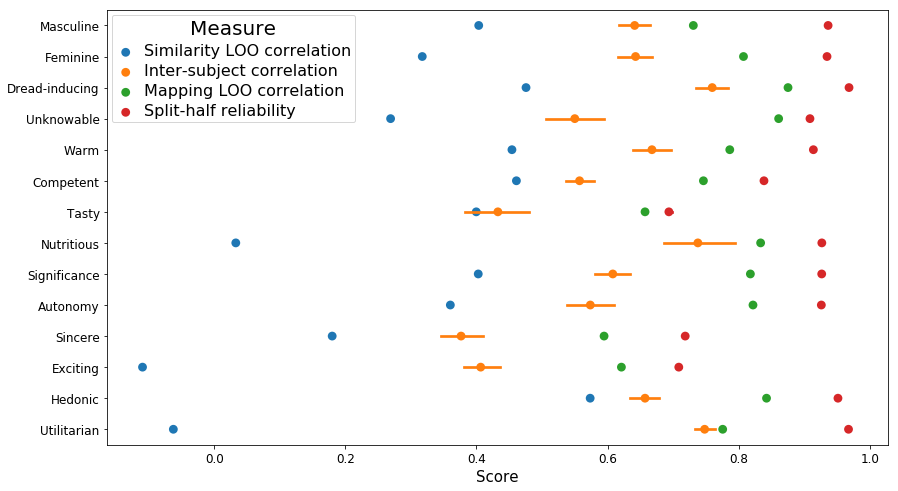

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))

ascending_measures = ['Similarity LOO correlation', 'Inter-subject correlation', 'Mapping LOO correlation', 'Split-half reliability']
sns.pointplot(y="Judgment", x="Score", hue="Measure", data=all_measures, join=False, hue_order=ascending_measures, ax=ax, ci=68);

ax.set_xlabel('Score', fontsize=15)
ax.tick_params(labelsize=12)

# ax.set_ylabel('Judgment Dimension', fontsize=20)
ax.set_ylabel('', fontsize=20)

plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='16') 

plt.savefig('figures/reliability_mapping_and_similarity_scores.png', pad_inches=10)
plt.savefig('figures/reliability_mapping_and_similarity_scores_high_res.png', pad_inches=10, dpi=500)

In [16]:
all_measures.Score = all_measures.Score.astype(float)

In [17]:
r, p = pearsonr(x=all_measures.query("Measure == 'Mapping LOO correlation'").sort_values('Judgment').Score.values,
         y=all_measures.query("Measure == 'Split-half reliability'").groupby('Judgment')['Score'].mean().values)
print(r, p)

0.8860721383129606 2.45930080941776e-05
